# WEEK 01 HOMEWORK

In [2]:
from __future__ import print_function
import os
data_path = ['data']
print (data_path)

['data']


In [3]:
import pandas as pd

#file path of iris data
fp = 'C:\\Users\\rites\\OneDrive\\Desktop\\Machine Learning 501\\Intel-ML101_Class1\\data\\Iris_Data.csv'

#import data
data = pd.read_csv(fp)

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [4]:
#no. of datapoints(rows)
print(data.shape[0])

150


In [5]:
#column names
print(data.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [6]:
#datatype for each column
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [7]:
data['species'] = data.species.str.replace('Iris-', '')

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [9]:
#number of each species present
data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [10]:
#mean
print(data.mean())

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


In [11]:
#median
print(data.median())

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64


In [12]:
#quantiles
print(data.quantile(0))

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
Name: 0, dtype: float64


In [13]:
#min and max
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [16]:
#mean by species
data.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [17]:
#median by species
data.groupby(['species']).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [18]:
#applying multiple functions at once
import numpy as np
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [29]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0,0.5,'Sepal Width (cm)'),
 Text(0.5,0,'Sepal Length (cm)'),
 Text(0.5,1,'Sepal Length vs Sepal Width')]

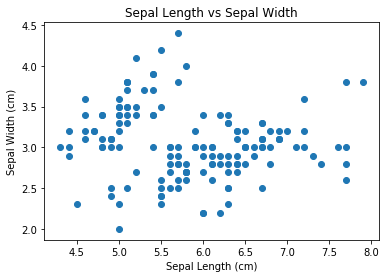

In [32]:
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)', ylabel='Sepal Width (cm)', title='Sepal Length vs Sepal Width')

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

Text(0.5,1,'sepal length')

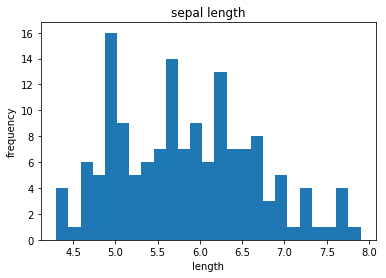

In [40]:
#making histogram
plt.hist(data.sepal_length, bins = 25)
plt.xlabel('length')
plt.ylabel('frequency')
plt.title('sepal length')

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          4.,  7., 21., 20., 21., 16., 19., 14., 15.,  5.,  2.,  6.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  4., 15., 38., 51., 24., 12.,  4.,
          6.,  7., 21., 20., 21., 16., 19., 14., 15.,  5.,  2.,  6.]),
  array([ 0.,  0.,  1., 10., 33.,  6.,  4., 15., 38., 52., 28., 15., 15.,
         16., 23., 34., 34., 33., 23., 23., 16., 18.,  5.,  2.,  6.]),
  array([48.,  2.,  8., 31., 57., 25., 19., 29., 38., 52., 28., 15., 15.,
         16., 23., 34., 34., 33., 23., 23., 16., 18.,  5.,  2.,  6.])],
 array([0.1  , 0.412, 0.724, 1.036, 1.348, 1.66 , 1.972, 2.284, 2.596,
        2.908, 3.22 , 3.532, 3.844, 4.156, 4.468, 4.78 , 5.092, 5.404,
        5.716, 6.028, 6.34 , 6.652, 6.964, 7.276, 7.588, 7.9  ]),
 <a list of 4 Lists of Patches objects>)

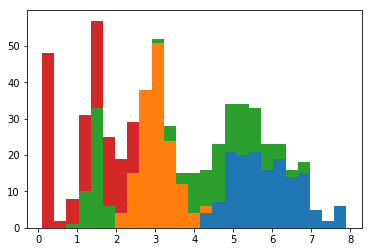

In [47]:
a = [data.sepal_length, data.sepal_width, data.petal_length, data.petal_width]
plt.hist(a, bins= 25, stacked=True)

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

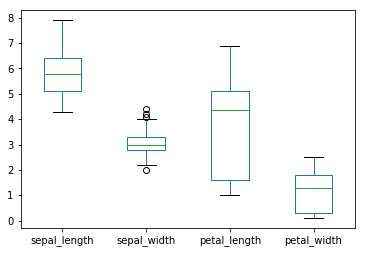

In [48]:
data.plot.box()

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [55]:
#importing seaborn
import seaborn as sns

In [59]:
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


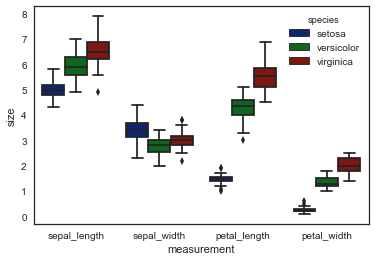

In [58]:
#sns.set_style('white')
#sns.set_context('notebook')
#sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

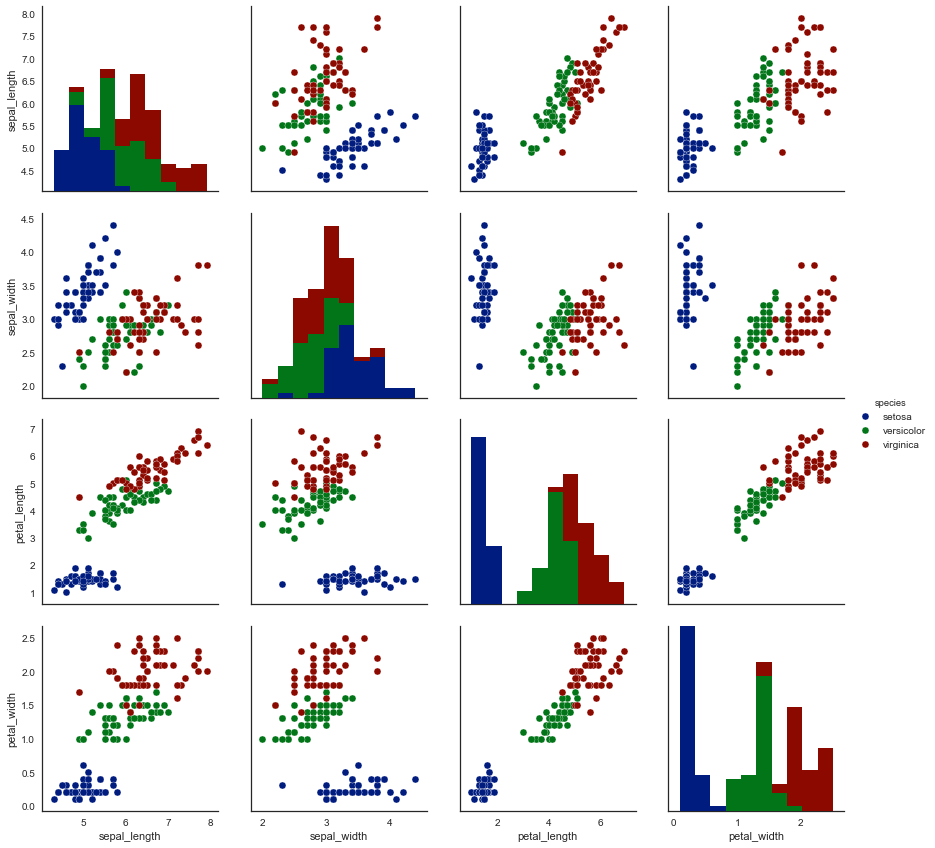

In [66]:
sns.pairplot(data, hue='species', size=3)

## Ritesh Kumar